In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read Both Wine Quality Files

https://archive.ics.uci.edu/ml/datasets/wine+quality

citation:
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.


In [57]:
red=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
               sep=";")
white=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
               sep=";")
print(red[:5])
print(white[:5])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Generate a single file with wine properties, but remove the quality flag

In [59]:
XRED=np.array(red.drop(columns=["quality"]))
XWHITE=np.array(white.drop(columns=["quality"]))

In [4]:
XRED[:3]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00]])

In [5]:
XWHITE[:3]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01]])

In [60]:
X=np.vstack([XRED,XWHITE])
print(len(XRED),len(XWHITE),len(X))

1599 4898 6497


## Define exemplar (Y) values as 1 for red and 0 for white whine

In [61]:
Y=[*(len(XRED)*[1]),*(len(XWHITE)*[0])]
len(Y)

6497

## build, run, and evaluate an ANN with sklearn

In [8]:
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, \
  precision_score, roc_auc_score, accuracy_score,confusion_matrix,roc_curve
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
print(len(XTRAIN),len(YTRAIN),len(XTEST),len(YTEST))
r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(3,4,4), random_state=1)
r.fit(XTRAIN,YTRAIN)
YP=r.predict(XTEST)
print(confusion_matrix(YTEST,YP))
print("Accuracy= ",accuracy_score(YTEST,YP))
print("Recall=   ",recall_score(YTEST,YP))
print("Precision=",precision_score(YTEST,YP) )

4872 4872 1625 1625
[[1202   17]
 [  22  384]]
Accuracy=  0.976
Recall=    0.9458128078817734
Precision= 0.9576059850374065


In [9]:
r.coefs_

[array([[ -0.10864229,   0.28846875,  -1.18018299],
        [ -0.25880407,  -0.46249913, -22.90380117],
        [ -0.4107765 ,  -0.20220586,   4.91369848],
        [  0.05082238,  -0.10579785,   0.37841769],
        [ -0.38695784,   0.49506554,  -3.88479104],
        [  0.22319148,  -0.10827203,  -0.12626195],
        [ -0.47083794,  -0.39527283,   0.13520811],
        [  0.6130904 ,  -0.24428194,   5.00436861],
        [  0.49280271,   0.51665473,  -0.77633858],
        [ -0.60351116,  -0.43228787, -17.14495319],
        [ -0.52588064,  -0.10329303,   1.66677715]]),
 array([[ 0.34532815,  0.61959834, -0.89194526,  0.46317128],
        [ 0.90518315,  0.45950756, -0.40653348,  0.53563431],
        [-0.73467318, -0.09648119,  3.68423734, -0.51984163]]),
 array([[-0.4994683 , -0.40607985, -0.01459553, -0.77358877],
        [ 0.1283738 , -0.61187615,  0.15467973,  0.34598716],
        [-0.76170769,  0.67321329,  0.82102447, -0.14864394],
        [-1.51781188,  2.50806746, -1.00549375,  0.0

In [10]:
r.intercepts_

[array([0.04342355, 0.25122611, 4.85225821]),
 array([-0.39296371, -0.68505397,  2.3678958 ,  0.08407673]),
 array([-1.12592974,  3.45525172,  1.25503017, -0.62791223]),
 array([1.18422383])]

## plot the ROC curve for the Red Wine identification

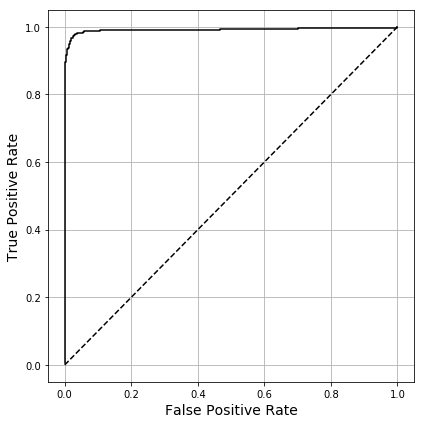

In [11]:
YPROB=r.predict_proba(XTEST)[:,1]
fpr, tpr, threshold = roc_curve(YTEST,YPROB)
plt.plot(fpr,tpr, c="k")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
plt.plot([0,1],[0,1],ls="--", c="k")
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig("ROC-CURVE-NNET-RedWineClassificiation.pdf")

## Code for visualizing a neural network

In [12]:
#layers=[2,5,4,5,2]
#inputs=["input1","input2"]
#outputs=["out1","out2"]
from graphviz import Digraph
# see https://graphviz.readthedocs.io
from os.path import isfile
def uniqueFileName(filename, type=""):    
    nameparts = filename.rsplit(".",1)
    if len(nameparts)<2:
        nameparts.append(type)
    left, right = nameparts
    i = 1
    fname = left+"."+right
    while isfile(fname):
        fname = left+str(i)+"."+right
        i += 1
    return(fname)

def VisualizeNN(hidden, inputs, outputs, file="NNVisualization"):
    layers=[len(inputs),*hidden,len(outputs)]
    dot=Digraph()
    i=1
    def nodename(i,j):
        return "L["+str(i)+"]["+str(j)+"]"
    for layer in layers:  
        for j in range(1,layer+1):
            if i==1:
                thelabel=inputs[j-1]
                theshape="ellipse"
            elif i==len(layers):
                thelabel=outputs[j-1]
                theshape="ellipse"
            else:
                thelabel=" "
                theshape="circle"
            dot.node(nodename(i,j),label=thelabel,shape=theshape)
            if i>1:
                thisnode=nodename(i,j)
                ilowerlayer=i-1
                ilowerlayers=layers[ilowerlayer-1]
                for k in range(1,ilowerlayers+1):
                    dot.edge(nodename(ilowerlayer,k),thisnode)#,         
        i+=1
    outputfile=uniqueFileName(file,type="gv")
    dot.render(outputfile, view=True)

Add newlines to long labels because otherwise it will take up a lot of space

In [13]:
input_labels=list(set([x.replace(" ","\n") for x in list(red.columns)])-set(["quality"]))
print(input_labels)
output_labels=["Output = 1 for Red Wine or 0 for White Wine"]

['chlorides', 'pH', 'volatile\nacidity', 'total\nsulfur\ndioxide', 'free\nsulfur\ndioxide', 'sulphates', 'citric\nacid', 'fixed\nacidity', 'alcohol', 'density', 'residual\nsugar']


In [14]:
VisualizeNN([3,4,4], input_labels,output_labels)

## Repeat the process, this time scale the x data

In [62]:
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, \
  precision_score, roc_auc_score, accuracy_score,confusion_matrix,roc_curve
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
XTRAINT=scaler.fit_transform(XTRAIN)
XTESTT=scaler.transform(XTEST)
print(len(XTRAIN),len(YTRAIN),len(XTEST),len(YTEST))
r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(3,4,4), random_state=1)
r.fit(XTRAINT,YTRAIN)
YP=r.predict(XTESTT)
print(confusion_matrix(YTEST,YP))
print("Accuracy= ",accuracy_score(YTEST,YP))
print("Recall=   ",recall_score(YTEST,YP))
print("Precision=",precision_score(YTEST,YP) )

4872 4872 1625 1625
[[1233    1]
 [   5  386]]
Accuracy=  0.9963076923076923
Recall=    0.9872122762148338
Precision= 0.9974160206718347


In [16]:
r.coefs_

[array([[-5.03404059e-01, -3.05889381e+00, -8.40766598e-01],
        [-3.48305758e-01,  2.55264600e+00, -6.64038129e-01],
        [-1.07734606e+00, -3.55303286e-01, -3.17796393e-01],
        [-2.27771935e-01, -2.36420174e+01,  2.32893871e-01],
        [-4.68676270e-01,  2.60385102e+00, -7.00183760e-01],
        [-1.39198536e-02,  6.98375768e+00, -2.14889655e-02],
        [-1.20359623e+00, -7.78017924e+00,  1.77445828e-01],
        [ 2.82772433e-01,  2.68804665e+01,  1.01953993e-01],
        [-7.61643436e-01, -1.54209942e+00, -9.78187056e-01],
        [-8.26156766e-01,  3.46884958e+00, -1.07052202e-02],
        [-1.06072348e+00,  2.30187015e+00,  1.78537678e-01]]),
 array([[ 0.22035835,  0.5984196 , -0.89190691,  0.14881171],
        [ 1.06905705, -7.68671309, -0.40651599, -3.77631146],
        [-0.71036062, -0.09648731,  0.75652955, -0.35190779]]),
 array([[-0.83442529, -0.68155062, -8.90831491, -0.7735555 ],
        [-2.66466755, -0.61184984, -1.46546629,  0.34597228],
        [-0.688

In [17]:
r.intercepts_

[array([-2.19002569, -2.81972644, -1.10012757]),
 array([ 0.63377748, -5.5327513 , -0.88995946,  0.44011015]),
 array([ 6.31033859,  3.09730134, -2.84074894, -0.62791223]),
 array([35.06316162])]

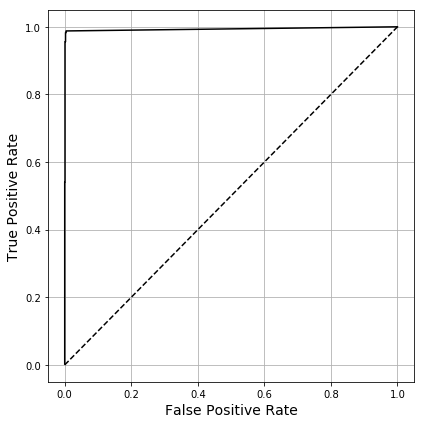

In [18]:
YPROB=r.predict_proba(XTESTT)[:,1]
fpr, tpr, threshold = roc_curve(YTEST,YPROB)
plt.plot(fpr,tpr, c="k")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
plt.plot([0,1],[0,1],ls="--", c="k")
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig("ROC-CURVE-NNET-RedWineClassificiation.pdf")

### explore accuracy for different size networks

In [65]:
accs=[]
sizes=range(3,20)
for size in sizes:
    r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(size,size,size), random_state=1)
    r.fit(XTRAINT,YTRAIN)
    YP=r.predict(XTESTT)
    acc=accuracy_score(YTEST,YP)
    print(size,1-acc)
    accs.append(acc)


3 0.24061538461538456
4 0.004307692307692346
5 0.004923076923076919
6 0.004307692307692346
7 0.006153846153846176
8 0.007384615384615434
9 0.004923076923076919
10 0.009846153846153838
11 0.00676923076923075
12 0.005538461538461492
13 0.005538461538461492
14 0.006153846153846176
15 0.005538461538461492
16 0.004923076923076919
17 0.008000000000000007
18 0.00861538461538458
19 0.004923076923076919


## Regression Model

In [19]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


In [20]:
Y=data["mpg"]
Y[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [21]:
X=data[["cyl", "displ","hp","weight","accel"]]
X[:5]


,cyl,displ,hp,weight,accel
0,8,307.0,130.0,3504.0,12.0
1,8,350.0,165.0,3693.0,11.5
2,8,318.0,150.0,3436.0,11.0
3,8,304.0,150.0,3433.0,12.0
4,8,302.0,140.0,3449.0,10.5


In [22]:
from sklearn.neural_network import MLPRegressor as REG

15.940540017273044 2.8638887116313216


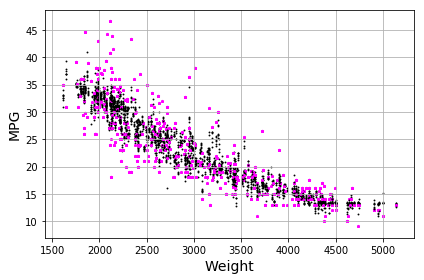

In [23]:
#XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
#print(len(XTRAIN),len(YTRAIN),len(XTEST),len(YTEST))
errors=[]
nruns=25
scaler = MinMaxScaler()
for j in range(nruns):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
    
    XTRAINT=scaler.fit_transform(XTRAIN)
    XTESTT=scaler.transform(XTEST)
    
    
    r = REG(solver='lbfgs', alpha=1e-5,random_state=1,
          hidden_layer_sizes=(5,5,5))
    r.fit(XTRAINT,YTRAIN)
    YP=r.predict(XTESTT)
    err=sum((np.array(YP)-np.array(YTEST))**2)/len(YTEST)
    errors.append(err)
    if j==0:
        plt.scatter(XTEST["weight"],YTEST,label="observed",marker="*",s=5,c="magenta")
        plt.scatter(XTEST["weight"],YP,label="predicted",marker=".",s=3,c="k")

    else:
        plt.scatter(XTEST["weight"],YTEST,marker="*",s=5,c="magenta")
        plt.scatter(XTEST["weight"],YP,marker=".",s=3,c="k")


#plt.scatter(XTEST["weight"],YTEST,marker="*",s=25,c="magenta")
#print(sum((np.array(YP)-np.array(YTEST))**2)/len(YTEST))
#plt.legend(fontsize=12);
plt.xlabel("Weight",fontsize=14)
plt.ylabel("MPG",fontsize=14)
plt.grid()
#plt.ylim(0,50)
fig=plt.gcf()
fig.tight_layout()
fig.savefig("MPG-NNET-cross-section-vs-weight-1.pdf")
print(np.mean(errors),np.std(errors))

# Multi-class classification -- MNIST Digits file

code inspired by https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python
as per documentation at http://yann.lecun.com/exdb/mnist/

In [3]:
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, \
  precision_score, roc_auc_score, accuracy_score,confusion_matrix,roc_curve
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import gzip
import matplotlib.pyplot as plt
%matplotlib inline

function to read an MNIST image file and returns an array of pixels, one line per per image (28x28 pixels)

In [5]:
def read_MNIST_images(zipfile):
    image_size = 28
    num_images=1
    maximages=100000
    f = gzip.open(zipfile,'r')
    X=[]
    i=0
    f.read(16)
    while(True):
        buf = f.read(image_size * image_size * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        if (len(data)<1) or (i>maximages):
            break
        data = data.reshape(num_images, image_size, image_size, 1)
        data=np.ravel(data)
        X.append(data)
        i+=1
    return(X)

Function to read an MNIST Label file and return a list of labels

In [6]:
def read_MNIST_labels(zipfile):
    f = gzip.open(zipfile,'r')
    Y=[]
    buf=f.read(8)
    header=np.frombuffer(buf,dtype=np.uint8).astype(np.int64)
    expect=sum(header[4:]*np.array([256*256*256,256*256,256,1]))
    print(header, " expecting: ",expect,"flags")
    while (True):
        buf = f.read(1 * 32)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        if len(labels)>0:
            Y=Y+list(labels)
        else:
            break
    return (Y)

## Read the MNIST Files
The MNIST files must still be in their original gzip form, not unzipped

The source web page notes that some browswers may attempt to unzip the files for you; you should turn this process off before you run read_MNIST_images or read_MNIST_labels.

In [7]:
XTRAIN=read_MNIST_images('../data/MNIST/train-images-idx3-ubyte.gz')
print(len(XTRAIN),"images read")
XTEST=read_MNIST_images('../data/MNIST/t10k-images-idx3-ubyte.gz')
print(len(XTEST),"images read")

60000 images read
10000 images read


In [8]:
YTRAIN=read_MNIST_labels("../data/MNIST/train-labels-idx1-ubyte.gz")
print(len(YTRAIN), YTRAIN[:5])
YTEST=read_MNIST_labels("../data/MNIST/t10k-labels-idx1-ubyte.gz")
print(len(YTEST), YTEST[:5])

[  0   0   8   1   0   0 234  96]  expecting:  60000 flags
60000 [5, 0, 4, 1, 9]
[ 0  0  8  1  0  0 39 16]  expecting:  10000 flags
10000 [7, 2, 1, 0, 4]


## Function to display some of the MNIST digits as an image

display_MNIST(kmin) displays the 25 digits starting at location kmin

In [29]:
def display_MNIST(kmin,outfile="MNIST-digit-examples.pdf"):
    maxrows=5
    fig,ax=plt.subplots(nrows=maxrows,ncols=5)
    for irow in range(maxrows):
        for icol in range(5):
            k=5*irow+icol+kmin
            img=np.array(XTRAIN[k]).reshape(28,28)
            # subtract from 1 to reverse image
            ax[irow][icol].imshow(1-img, aspect="auto",cmap="gray")
            ax[irow][icol].set_xticks([])
            ax[irow][icol].set_yticks([])
    fig.set_size_inches(5,maxrows)
    fig.tight_layout()
    fig.savefig(outfile)

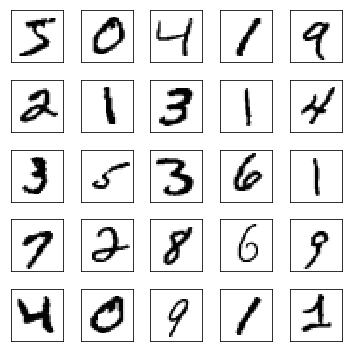

In [28]:
display_MNIST(0)

Transform the feature data to standard interval for classification

In [30]:
scaler = MinMaxScaler()
XTRAINT=scaler.fit_transform(XTRAIN)
XTESTT=scaler.transform(XTEST)

Classify with a neural network with 3 hidden layers of size 5, 5, 5

In [31]:
r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(5,5,5), random_state=1)
r.fit(XTRAINT,YTRAIN)
YP=r.predict(XTESTT)
print(confusion_matrix(YTEST,YP))
print("Accuracy= ",accuracy_score(YTEST,YP))

[[ 798    4   11   37    0  119    4    1    6    0]
 [   0 1062    4    1    0    1    6    3   58    0]
 [   0   62  459  250    4   19  111   14  113    0]
 [   5   52  140  457    2  241   35    7   71    0]
 [   0   44    2    0  754    0    2  173    7    0]
 [ 119   37   68  204    2  413   16   12   21    0]
 [   4   99  204   47    2   11  215    7  369    0]
 [   0  136    3    0  442    1    5  431   10    0]
 [   3  298  106   28    3   13   85   11  427    0]
 [   2   38    4    8  653    0    2  291   11    0]]
Accuracy=  0.5016


Try again with a hidden layers (10, 10, 10)

In [32]:
r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(10,10,10), random_state=1)
r.fit(XTRAINT,YTRAIN)
YP=r.predict(XTESTT)
print(confusion_matrix(YTEST,YP))
print("Accuracy= ",accuracy_score(YTEST,YP))

[[ 944    0    1    3    2   12   12    3    1    2]
 [   0 1091    5   10    1    2    1    1   23    1]
 [  13    1  902   48   14    1   16   17   15    5]
 [   7    4   30  869    1   48    2   14   25   10]
 [   2    2    5    0  878    2   18    0    7   68]
 [  17    0   12   68   15  684    9    8   65   14]
 [  24    1   12    0   13   15  880    0   13    0]
 [   5   11   22    7    2    1    0  918    0   62]
 [   4   21    9   27   33   89   13    2  764   12]
 [   8    6    1    6   97   23    3   21    9  835]]
Accuracy=  0.8765


In [34]:
accs=[]
for size in [5, 10, 20, 40, 80, 160, 320]:
    print("*****")
    print("Hidden layers =",(size, size, size))
    r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(size, size, size), random_state=1)
    r.fit(XTRAINT,YTRAIN)
    YP=r.predict(XTESTT)
    print(confusion_matrix(YTEST,YP))
    acc=accuracy_score(YTEST,YP)
    accs.append(acc)
    print("Accuracy= ",acc)

*****
Hidden layers = (5, 5, 5)
[[ 798    4   11   37    0  119    4    1    6    0]
 [   0 1062    4    1    0    1    6    3   58    0]
 [   0   62  459  250    4   19  111   14  113    0]
 [   5   52  140  457    2  241   35    7   71    0]
 [   0   44    2    0  754    0    2  173    7    0]
 [ 119   37   68  204    2  413   16   12   21    0]
 [   4   99  204   47    2   11  215    7  369    0]
 [   0  136    3    0  442    1    5  431   10    0]
 [   3  298  106   28    3   13   85   11  427    0]
 [   2   38    4    8  653    0    2  291   11    0]]
Accuracy=  0.5016
*****
Hidden layers = (10, 10, 10)
[[ 944    0    1    3    2   12   12    3    1    2]
 [   0 1091    5   10    1    2    1    1   23    1]
 [  13    1  902   48   14    1   16   17   15    5]
 [   7    4   30  869    1   48    2   14   25   10]
 [   2    2    5    0  878    2   18    0    7   68]
 [  17    0   12   68   15  684    9    8   65   14]
 [  24    1   12    0   13   15  880    0   13    0]
 [   5   11  

In [35]:
accs

[0.5016, 0.8765, 0.9539, 0.9711, 0.9768, 0.9785, 0.979]

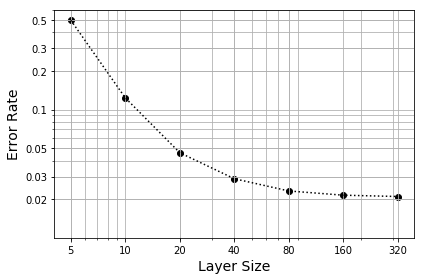

In [56]:
sizes=[5, 10, 20, 40, 80, 160, 320]
errs=1-np.array(accs)
plt.scatter(sizes, errs,c="k")
plt.plot(sizes,errs,c="k",ls=":")
plt.xlabel("Layer Size",fontsize=14)
plt.ylabel("Error Rate",fontsize=14)
plt.ylim([.01,.6])
plt.yscale("log")
plt.xscale("log")
plt.yticks([.02,.03,.05,.1,.2,.3,.5],[.02,.03,.05,.1,.2,.3,.5])
plt.xticks(sizes,sizes)
plt.grid(axis="both",which="both")
fig=plt.gcf()
fig.tight_layout()
fig.savefig("nnet-error-rate-vs-layer-size-digits.pdf")